## Ejericico 2 Dataset Regresión Logística – Heart Disease Cleveland UCI

In [2]:
# Importar librerías necesarias
import pandas as pd  # Manipulación de datos
import numpy as np  # Operaciones numéricas
import matplotlib.pyplot as plt  # Visualización
import seaborn as sns  # Gráficos estadísticos
from sklearn.model_selection import train_test_split  # Dividir datos
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score  # Métricas
from sklearn.preprocessing import StandardScaler  # Escalar variables
from sklearn.feature_selection import SelectKBest, f_classif  # Selección de características
import warnings
warnings.filterwarnings('ignore')

Primeras filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3  

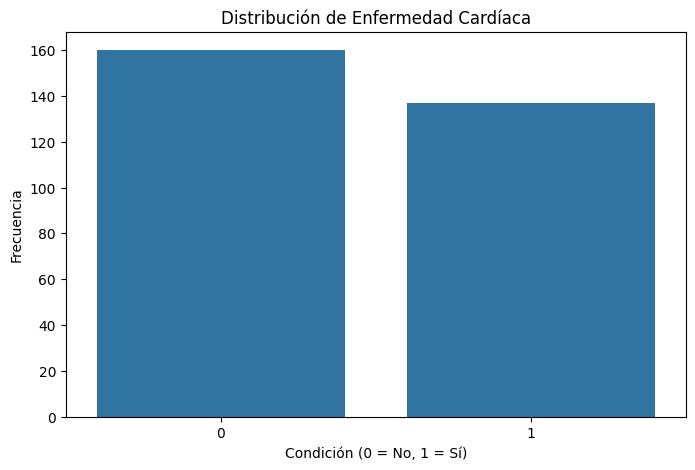

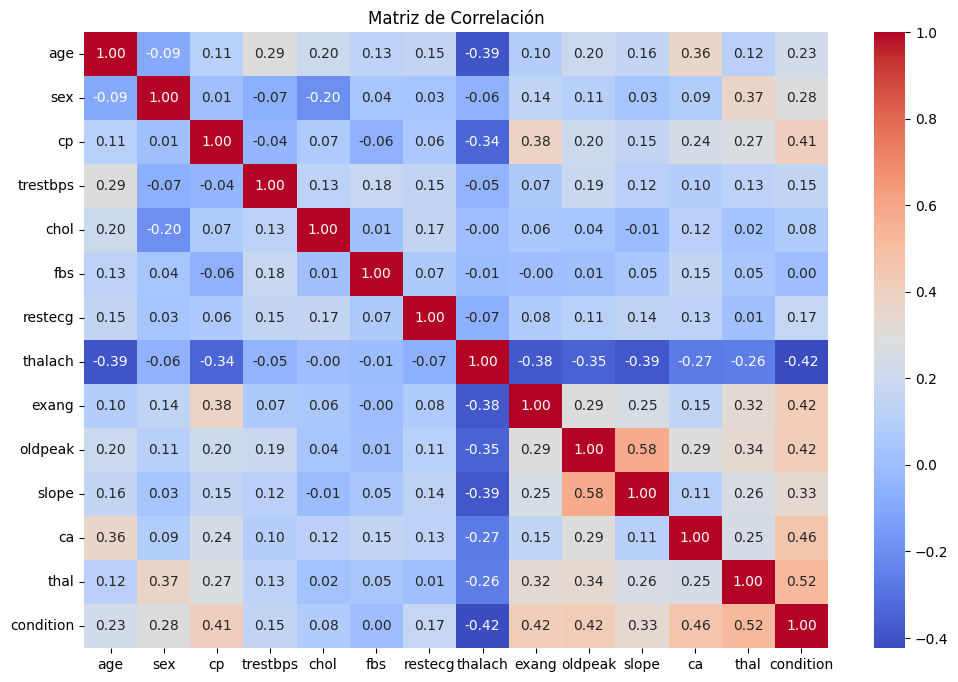

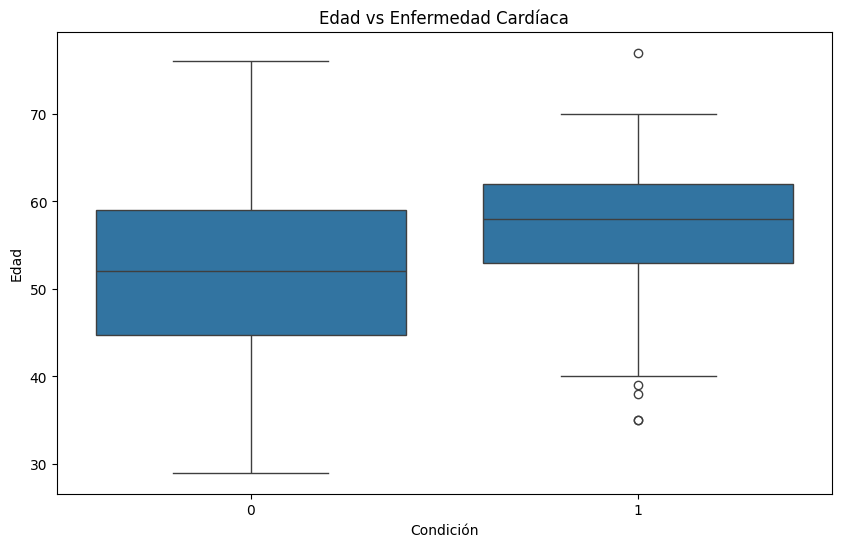

In [3]:
# --------------------------------------
# 1. Análisis Exploratorio de Datos (EDA)
# --------------------------------------
# Cargar el dataset
UCI = pd.read_csv('C:/Users/Family/Videos/heart_cleveland_upload.csv')

# Mostrar primeras filas
print("Primeras filas del dataset:")
print(UCI.head())

# Información general
print("\nInformación del dataset:")
print(UCI.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(UCI.describe())

# Visualizar distribución de la variable objetivo (enfermedad cardíaca: 0 = no, 1 = sí)
plt.figure(figsize=(8, 5))
sns.countplot(x='condition', data=UCI)
plt.title('Distribución de Enfermedad Cardíaca')
plt.xlabel('Condición (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(UCI.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Boxplot de edad vs condición
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='age', data=UCI)
plt.title('Edad vs Enfermedad Cardíaca')
plt.xlabel('Condición')
plt.ylabel('Edad')
plt.show()

In [4]:
# --------------------------------------
# 2. Preprocesamiento de Datos
# --------------------------------------
# Verificar valores faltantes (este dataset no tiene, pero lo confirmamos)
print("\nValores faltantes por columna:")
print(UCI.isnull().sum())

# Separar características (X) y variable objetivo (y)
X = UCI.drop('condition', axis=1)  # Todas las columnas menos 'condition'
y = UCI['condition']  # Variable objetivo

# Escalar las características para mejorar el modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Valores faltantes por columna:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [5]:
# --------------------------------------
# 3. Selección de Características
# --------------------------------------
# Seleccionar las mejores características usando SelectKBest
selector = SelectKBest(score_func=f_classif, k=8)  # Seleccionar 8 características
X_selected = selector.fit_transform(X_scaled, y)

# Obtener nombres de características seleccionadas
selected_features = [X.columns[i] for i in selector.get_support(indices=True)]
print("\nCaracterísticas seleccionadas:", selected_features)

# Actualizar X_scaled
X_scaled = X_selected



Características seleccionadas: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [6]:
# --------------------------------------
# 4. Dividir el Dataset
# --------------------------------------
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)



Tamaño del conjunto de entrenamiento: (237, 8)
Tamaño del conjunto de prueba: (60, 8)


In [7]:
# --------------------------------------
# 5. Entrenar el Modelo
# --------------------------------------
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [8]:
# --------------------------------------
# 6. Evaluar el Modelo
# --------------------------------------
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Mostrar resultados
print(f"\nPrecisión: {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")


Precisión: 0.75
Precisión (Precision): 0.71
Recall: 0.79
F1-Score: 0.75
AUC-ROC: 0.84


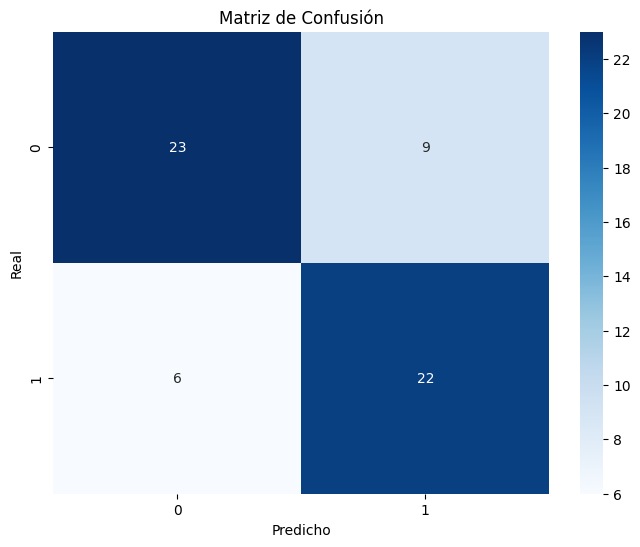

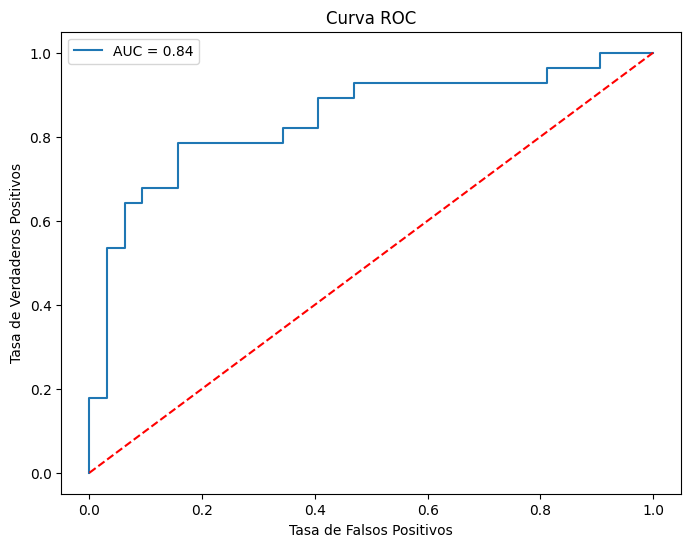

In [9]:
# --------------------------------------
# 7. Visualizaciones de Resultados
# --------------------------------------
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()


In [10]:
# --------------------------------------
# 8. Interpretación y Documentación
# --------------------------------------
print("\nInterpretación de Resultados:")
print(f"- Precisión global del {accuracy*100:.2f}% indica un buen ajuste general.")
print(f"- Recall ({recall:.2f}) muestra la capacidad de detectar casos positivos.")
print(f"- AUC-ROC ({roc_auc:.2f}) indica un buen poder discriminativo.")
print("- Características clave:", selected_features)
print("- La matriz de confusión revela falsos positivos/negativos.")
print("- Posibles mejoras: ajustar el umbral de clasificación, usar class_weight para clases desbalanceadas.")


Interpretación de Resultados:
- Precisión global del 75.00% indica un buen ajuste general.
- Recall (0.79) muestra la capacidad de detectar casos positivos.
- AUC-ROC (0.84) indica un buen poder discriminativo.
- Características clave: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
- La matriz de confusión revela falsos positivos/negativos.
- Posibles mejoras: ajustar el umbral de clasificación, usar class_weight para clases desbalanceadas.
